# **Comparison of Linear Regression, Decision Trees and Support Vector Machines in Predicting Carbon Emission**

In [1]:
import math
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('Fuel.csv')
print('Shape of data is: ', df.shape)
df.head()

Shape of data is:  (946, 15)


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
df.drop(columns='Model Year', inplace=True)

In [5]:
col_names = ["Make", "Model", "Vehicle", "Engine", "Cylinders", "Transmission", "Fuel", "FC_City", "FC_Hwy", "FC_Comb_L", "FC_Comb_Mpg", "Emission", "CO2 Rating", "Smog Rating"]
df.columns = col_names

**Analysing quantitave value columns with response variable Emission**

In [6]:
newdf = df[['Engine', 'Cylinders', 'FC_City','FC_Hwy', 'FC_Comb_L', 'FC_Comb_Mpg', 'Emission']]

**Plotting Data For Initial Inspection of Relation between Response and Independent variables. Numpy polyfit method was used to compute least squares polynomial for given set of data**

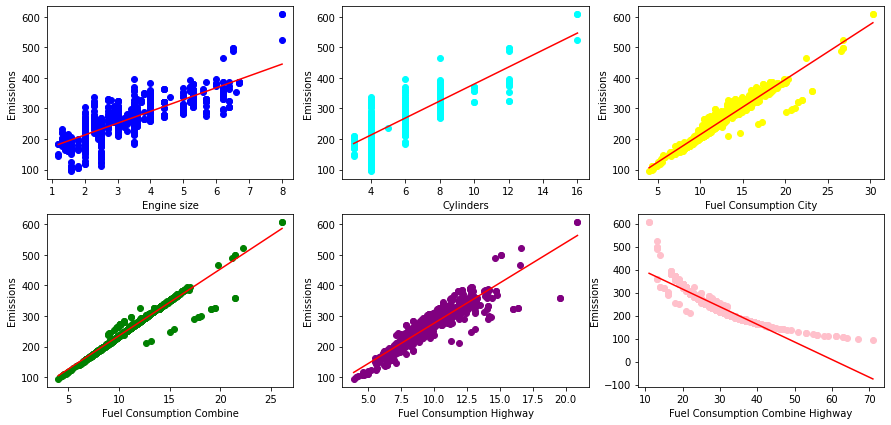

In [7]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.scatter(newdf.Engine, newdf.Emission,  color='blue')
fit=np.polyfit(newdf.Engine,newdf.Emission,1)
x=np.linspace(min(newdf.Engine),max(newdf.Engine),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Engine size")
plt.ylabel("Emissions")

plt.subplot(2,3,2)
plt.scatter(newdf.Cylinders, newdf.Emission,  color='cyan')
fit=np.polyfit(newdf.Cylinders,newdf.Emission,1)
x=np.linspace(min(newdf.Cylinders),max(newdf.Cylinders),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")

plt.subplot(2,3,3)
plt.scatter(newdf.FC_City, newdf.Emission,  color='yellow')
fit=np.polyfit(newdf.FC_City,newdf.Emission,1)
x=np.linspace(min(newdf.FC_City),max(newdf.FC_City),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption City")
plt.ylabel("Emissions")

plt.subplot(2,3,4)
plt.scatter(newdf.FC_Comb_L, newdf.Emission,  color='green')
fit=np.polyfit(newdf.FC_Comb_L,newdf.Emission,1)
x=np.linspace(min(newdf.FC_Comb_L),max(newdf.FC_Comb_L),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption Combine")
plt.ylabel("Emissions")

plt.subplot(2,3,5)
plt.scatter(newdf.FC_Hwy, newdf.Emission,  color='purple')
fit=np.polyfit(newdf.FC_Hwy,newdf.Emission,1)
x=np.linspace(min(newdf.FC_Hwy),max(newdf.FC_Hwy),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption Highway")
plt.ylabel("Emissions")

plt.subplot(2,3,6)
plt.scatter(newdf.FC_Comb_Mpg, newdf.Emission,  color='pink')
fit=np.polyfit(newdf.FC_Comb_Mpg,newdf.Emission,1)
x=np.linspace(min(newdf.FC_Comb_Mpg),max(newdf.FC_Comb_Mpg),101)
plt.plot(x,np.polyval(fit,x),'r')
plt.xlabel("Fuel Consumption Combine Highway")
plt.ylabel("Emissions")
plt.savefig('VisualRepresentationofData.png')
plt.show()


**Train and Test Split Function is Used to Create Training and Test Data**

In [27]:
X = newdf.drop(['Emission'], axis=1).values
Y = newdf['Emission'].values
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size = 0.3, random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
MSE = np.square(np.subtract(Y_test, y_pred)).mean()
print("MSE: ", MSE)
print('R squared score: %.2f' % r2_score(Y_test,y_pred)) 

MSE:  106.78343778516974
R squared score: 0.97


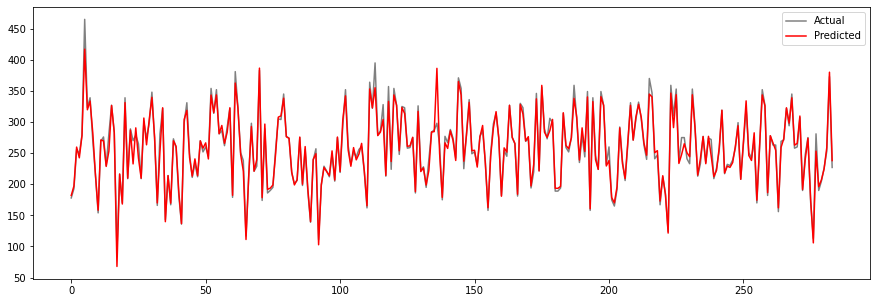

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y_test, color = 'gray', label='Actual')
plt.plot(y_pred, color = 'red', label = 'Predicted')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


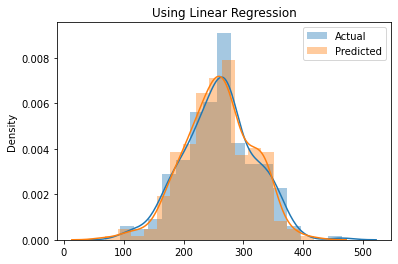

In [20]:
sns.distplot(Y_test, label='Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend()
plt.title('Using Linear Regression')
plt.savefig('LinearRegressionDataModeling.png')

In [11]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
pred_dt = decision_tree.predict(X_test)
MSE = np.square(np.subtract(Y_test, pred_dt)).mean()
print("MSE: ", MSE)
print('R squared score: %.2f' % r2_score(Y_test,pred_dt)) 

MSE:  144.42957746478874
R squared score: 0.96


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


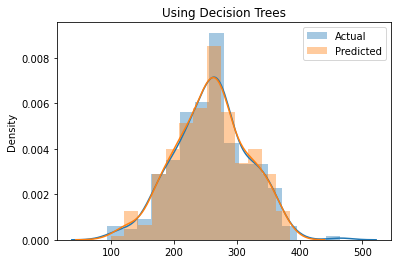

In [25]:
plt.figure()
sns.distplot(Y_test, label="Actual")
sns.distplot(pred_dt, label="Predicted")
plt.legend()
plt.title('Using Decision Trees')
plt.savefig('DecisionTreesDataModeling.png')
plt.show()

In [13]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn import metrics

sv = SVC(kernel="linear")
sv.fit(X_train, Y_train)

pred_sv = sv.predict(X_test)

MSE = np.square(np.subtract(Y_test, pred_sv)).mean()
print("RMSE: ", MSE)
print('R squared score: %.2f' % r2_score(Y_test,pred_sv)) 

RMSE:  163.90140845070422
R squared score: 0.95


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


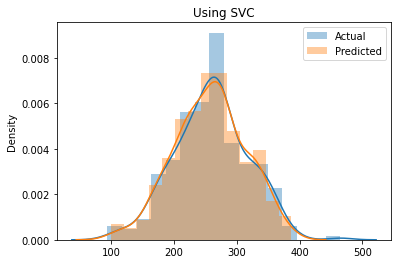

In [24]:
plt.figure()
sns.distplot(Y_test, label="Actual")
sns.distplot(pred_sv, label="Predicted")
plt.legend()
plt.title('Using SVC')
plt.savefig('SVMDataModeling.png')
plt.show()